## Comparison of Simple and Wasserstein Computation

This code compares the result of load cases, when computing with the simple profile-based metric, i.e. create_load_cases_simple..., with when using a distribution-based approach and computing the wasserstein distances to merge distributions, i.e. create_load_cases_binomial....


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from load_case_clustering import load_scenario_data_from_yaml

distribution_based_load_case = load_scenario_data_from_yaml("output_files/GPZ_distribution_based_load_cases.yml")
profile_based_load_case = load_scenario_data_from_yaml("output_files/GPZ_profile_based_load_cases.yml")

# remove max load case which is only implemented for profile based approach
del profile_based_load_case["scenario"]["max"]

In [2]:
def sort_loaded_dict(data, sort_by_room="2-1~5"):
    inter = sorted(
            data['scenario'].items(),
            key=lambda item: item[1]['room']["2-1~5"]['mean'],
            reverse=True
        )
    return {i: v for i, (_, v) in enumerate(inter)}

distribution_based_load_case = {"scenario": sort_loaded_dict(distribution_based_load_case)}
profile_based_load_case = {"scenario": sort_loaded_dict(profile_based_load_case)}


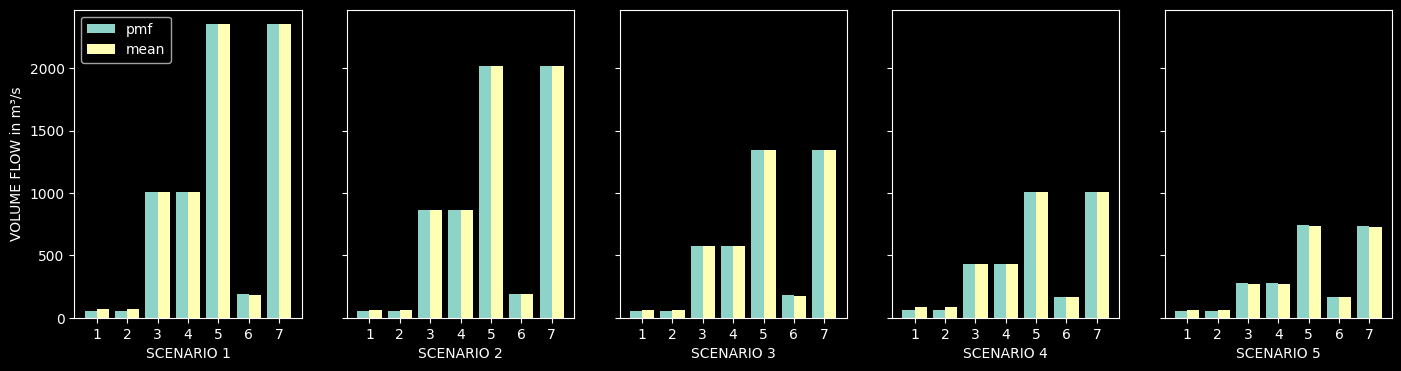

In [3]:
len_l = len(distribution_based_load_case["scenario"][0]["room"])

fig, ax = plt.subplots(1,5,sharex=True, sharey=True, figsize=(17,4))

ax = ax.flatten()

for idx, s in enumerate(distribution_based_load_case["scenario"].keys()):
    load_case_q = list()
    simple_load_case_q = list()
    for r in distribution_based_load_case["scenario"][s]["room"].keys():
        load_case_q.append(distribution_based_load_case["scenario"][s]["room"][r]["mean"])
        simple_load_case_q.append(profile_based_load_case["scenario"][s]["room"][r]["mean"])
    x_label = np.arange(1,len_l+1)
    ax[idx].bar(x_label, load_case_q,width=0.4,label="pmf")
    ax[idx].bar(x_label+0.4, simple_load_case_q,width=0.4,label="mean")
    ax[idx].set_xticks(x_label+0.2, x_label)
    ax[idx].set_xlabel(f"SCENARIO {idx+1}")

ax[0].set_ylabel("VOLUME FLOW in m³/s")
_ = ax[0].legend()